In [1]:
%matplotlib inline

import numpy as np
import os
import tarfile
import urllib
from IPython.display import display, Image
from scipy import ndimage
import cPickle as pickle
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd

C:\Users\michel chomnoue\Anaconda2\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
def load_data(file_name):
     with open(file_name, 'rb') as f:
        data=pickle.load(f)
        labels=data["label"].astype(np.int32)
        images=data["image"]
        del data
        return images,labels
loaded_train_data,loaded_train_labels=load_data("../train.pickle")
loaded_extra_data,loaded_extra_labels=load_data("../extra.pickle")
test_data,test_labels=load_data("../test.pickle")
print("train:",loaded_train_data.shape,loaded_train_labels.shape)
print("extra:",loaded_extra_data.shape,loaded_extra_labels.shape)
print("test:",test_data.shape,test_labels.shape)

('train:', (33402L, 32L, 32L, 1L), (33402L, 6L))
('extra:', (202353L, 32L, 32L, 1L), (202353L, 6L))
('test:', (13068L, 32L, 32L, 1L), (13068L, 6L))


In [3]:
data=np.concatenate((loaded_train_data,loaded_extra_data,test_data))
labels=np.concatenate((loaded_train_labels,loaded_extra_labels,test_labels))
print("data:",data.shape,labels.shape)

('data:', (248823L, 32L, 32L, 1L), (248823L, 6L))


showing some labels and images for data
('data shape: ', (248823L, 32L, 32L, 1L))
('labels shape: ', (248823L, 6L))
[5, 3, 9]


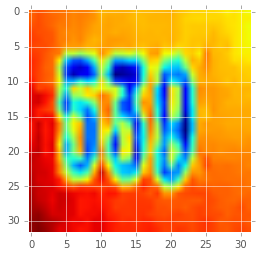

[3, 4]


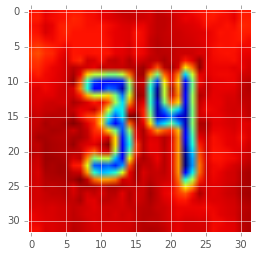

[4, 0, 4, 2]


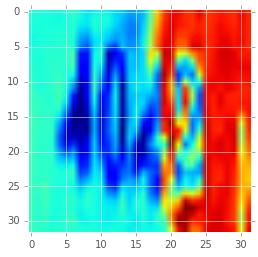

[9]


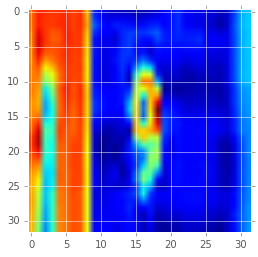

[6, 7]


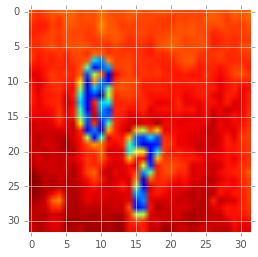

In [4]:
image_size=32
def display_image(image):
    plt.figure()
    plt.imshow(image)
    plt.show()
    
def display_images(data,labels,name=None,num_images=5):
    print ("showing some labels and images for %s"%name)  
    print ("data shape: ",data.shape)
    print("labels shape: ",labels.shape)
    total_images=data.shape[0]
    for i in np.random.choice(total_images,num_images):
        print([l for l in labels[i] if l!=10])   
        display_image(data[i].reshape(image_size,image_size))
            
display_images(data,labels,"data")

In [5]:
pd_labels=pd.DataFrame(data=labels,columns=range(1,7))

In [6]:
pd_labels[:5]

,1,2,3,4,5,6
0,9,10,10,10,10,10
1,3,6,10,10,10,10
2,7,8,10,10,10,10
3,8,10,10,10,10,10
4,1,0,5,10,10,10


In [7]:
valid_digits=pd_labels.apply(lambda x:x!=10)

In [8]:
valid_digits[:5]

,1,2,3,4,5,6
0,True,False,False,False,False,False
1,True,True,False,False,False,False
2,True,True,False,False,False,False
3,True,False,False,False,False,False
4,True,True,True,False,False,False


In [9]:
digit_lengths=valid_digits.sum(axis=1)

In [10]:
digit_lengths[:5]

0    1
1    2
2    2
3    1
4    3
dtype: int64

In [11]:
print("total digits: ",digit_lengths.sum())

('total digits: ', 630420L)


In [12]:
print("average number of digits per image",digit_lengths.mean())

('average number of digits per image', 2.533608227535236)


In [13]:
grouped=digit_lengths.groupby(digit_lengths.values)
print("digit length counts", grouped.count())

('digit length counts', 1     17005
2     98212
3    117561
4     15918
5       126
6         1
dtype: int64)


In [18]:
digit_counts=pd.DataFrame()
for i in range(10):
    digit_counts[str(i)]=pd_labels.apply(lambda x:x==i).sum(axis=1)

In [19]:
digit_counts[:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,1,0
4,1,1,0,0,0,1,0,0,0,0


In [20]:
number_of_mages_with_at_least_one=digit_counts.apply(lambda x:x!=0).sum(axis=0)

In [21]:
number_of_mages_with_at_least_one

0    48329
1    95737
2    79596
3    65547
4    56052
5    57956
6    46443
7    48376
8    40009
9    38655
dtype: int64

[<matplotlib.text.Text at 0xb0d5da0>, <matplotlib.text.Text at 0x11bd7f98>]

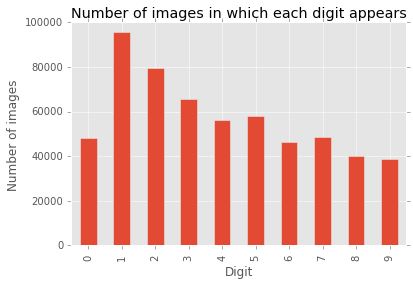

In [38]:
number_of_mages_with_at_least_one.plot.bar(title="Number of images in which each digit appears").set(xlabel="Digit", ylabel="Number of images")

In [30]:
number_of_digit_occurences=digit_counts.sum(axis=0)

[<matplotlib.text.Text at 0x1414aeb8>, <matplotlib.text.Text at 0x128d0e10>]

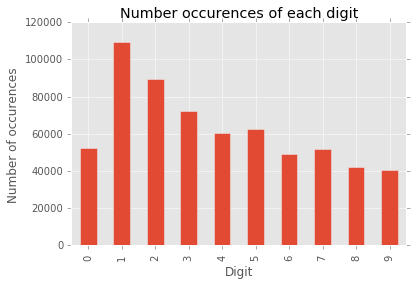

In [37]:
number_of_digit_occurences.plot.bar(title="Number occurences of each digit").set(xlabel="Digit", ylabel="Number of occurences")